# Minimization (from Ch. 6) + Ch. 7 Fourier Transforms
This notebook contains one last topic from Ch. 6 regarding minimization. Then we turn our attention to Chapter 7: Fourier Transforms.

### Finding Minimums and Maximums

Often in physics we are tasked with locating minimum or maximums of functions. In data analysis we determined the best fit by determining the minimum of the $\chi^{2}$ function. We may wish to find equilibrium points which correspond to minimum energy states (either local minima or global minima). In this section, we complete Ch. 6 and look at numerical techniques to find minima and maxima.

One method of identifying minima is quite similar to the Binary Search method for finding roots. It is called the Golden Ratio search. Instead of two points in an interval, we need four with a minimum occuring somewhere between the first and last. Comparing the values of the function at the different points, one can systematically narrow the interval until it *zooms in* on the minimum of the function to some specified accuracy. The method is described in Section 6.4.1. In the next cell it is implemented for Example 6.5 to find the minimum of the Buckingham potential
$$
V(r) = V_{0} \left[ \left( \frac{\sigma}{r} \right) ^{6} - e^{-r/\sigma} \right]
$$

In [2]:
from math import exp,sqrt

sigma = 1.0        # Value of sigma in nm
accuracy = 1e-6    # Required accuracy in nm
z = (1+sqrt(5))/2  # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the ofur points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process
while x4-x1 > accuracy:
    if f2<f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = x4 - (x4-x1)/z
        f2 = f(x2)
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = f(x3)

# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")

The minimum falls at 1.630516067174875 nm


### Question
What happens if you change the accuracy to be $10^{-14}$, $10^{-15}$, $10^{-16}$? Why do you think this happens?
### ANSWER: I think this will increase the number of iterations that the program will run, since it will take more steps to get within the desired accuracy range of search parameter.


The Golden Ratio Search for finding minima is similar to the Binary Search for roots. It suffers from the same disadvantages, it can only be used for functions of a single variable. But it is a straightforward, relatively simple method and provides a good starting point if you need to do minimization.

For more complicated cases other techniques are available. Two of these are the *Gauss-Newton method* and the *gradient descent* method. They, of course have their own advantages and disadvantages. 

In general, we should recognize that minima occur when
$$
f^{'}(x) = 0
$$.
If we are dealing with a function if many variables, $x_{i}$, the derivative with respect to each must be zero
$$
\frac{df^{'}(x)}{dx} = 0
$$.
This is a system of "i" equations in "i" unknown variables, $x_{i}$. If they are linear equations you might use Gaussian elimination to find the roots. If you they are non-linear you might try one of the other methods, relaxation method, newton's method, etc. Finding the minima has been reduced to finding the roots of the derivatives.

The *Gauss-Newton* method is really an extention of Newton's method. For a single variable we computed
$$
x^{'} = x - \frac{f(x)}{f^{'}(x)}.
$$
For minima we need the locations of the roots of the derivative. Replace $f(x)$ with $f^{'}(x)$ and replace $f^{'}(x)$ with $f^{''}(x)$
$$
x^{'} = x - \frac{f^{'}(x)}{f^{''}(x)}.
$$
The rest is the same. If you don't have an analytic function (say only data representing the function) you can use a numerical derivative
$$
f^{'}(x) = \frac{f(x_{2}) - f(x_{1})}{x_{2}-x_{1}}
$$And if you don't know the second derivative you can approximate it with a number $\gamma$ as in
$$
x^{'} = x - \gamma f^{'}(x).
$$
As long as it is the right order of magnitude the *Gauss-Newton* method will converge fairly efficiently. If you use this method and use a numerical derivatives, you are actually finding the minima knowing only the value of the function itself, f(x), at various points.

There are many other methods of various complexity and that are appropriate in different cases. Each has its own set of advantages and disadvantages. All kinds of useful Computational Physics algorthms, on this and many other topics, can be found in:

**Press, W. H., Teukolsky, S. A., Verrerling, W. T. and Flannery, B. P., Numerical Recipes in C, Cambridge Unerversity Press, Cambridge (1992)**

This is an extremely useful reference you should be aware of. Even if the algorithms are in C, they can be a great starting point for whichever language you are using.

In fact, for an astrophysics class project I once used an extension of Fourier analysis for unevenly spaced data. It was called a Lomb normalized periodogram. I took that algrorithm from this very same book, *Numerical Recipes in C*. Which brings us to the next Chapter, Fourier Transforms...

# Chapter 7 - Fourier Transforms
You have probably learned about Fourier transforms at some point in your physics or mathematics experience. Fourier transforms allow us to represent functions to arbitrary accuracy in terms of sine, cosine or exponential functions. They allow us to look for periodic behavior in data, even when that behavior might not be clear to the eye. Applications appear in theoretical physics where we might represent a solution to a differential equation as a Fourier series. They are used throughout signal processing and underlie essentially all digital information formats (JPEGs, MPEGs, MP3s, etc.)

### Fourier series
There are several types of Fourier series that are useful for different situations. If we need to represent an even function in an interval 0 to L (one symmetric about $x=\frac{1}{2}L$) then we could use a series of cosine functions
$$
f(x) = \sum_{k=0}^{\infty} \alpha_{k} \cos \left( \frac{2 \pi kx}{L} \right).
$$
Cosine functions of different wavelengths (determined by k) contribute with different weights $a_{k}$ and reproduce the functions f(x). In reality most of the $\infty$ terms will be neglible. For an even function there can be no contributions from sine terms. On the other hand if our function is odd between 0 and L, it can only contain sine terms
$$
f(x) = \sum_{k=1}^{\infty} \beta_{k} \sin \left( \frac{2 \pi kx}{L} \right).
$$
The sum starts from $k=1$ for the sine series because $\sin \left( \frac{2 \pi kx}{L} \right)=0$ when $k=0$.

Most of the time a function is neither odd nor even. We can simply add these
$$
f(x) = \sum_{k=0}^{\infty} \alpha_{k} \cos \left( \frac{2 \pi kx}{L} \right) + \sum_{k=1}^{\infty} \beta_{k} \sin \left( \frac{2 \pi kx}{L} \right).
$$
A more convenient form is obtained by substituting
$$
\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} \qquad \text{and} \qquad
\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2}.
$$
Then
$$
f(x) = \sum_{k=-\infty}^{\infty} \gamma_{k} e^{\frac{i 2 \pi kx}{L}}.
$$
with coefficients
$$
\gamma_{k} = \left\{ 
    \begin{array}\\ 
        \frac{1}{2} \left( \alpha_{-k} + i \beta_{-k} \right) & \ \mbox{if } k < 0 \\
        \alpha_{0} & \ \mbox{if } k = 0 \\
        \frac{1}{2} \left( \alpha_{k} + i \beta_{k} \right) & \ \mbox{if } k > 0 \\
    \end{array}
\right.
$$
This form, with complex coefficients $\gamma_{k}$ is more general than the cosine or sine series. 

While Fourier transforms are technically valid only for periodic functions, we can always represent a function in an interval from 0 to L by assuming it repeats over and over again. The Fourier representation will not give correct values outside of the interval 0 to L, but inside it will do just fine! 

Now let's see how to determine the coefficients $\gamma_{k}$. We can multiply $f(x)$ by $e^{-i(2 \pi kx/L)}$ and integrate over our interval 0 to L 
$$
\int_{0}^{L} f(x) e^{-i \frac{2 \pi kx}{L}} dx = \sum_{k^{'}=-\infty}^{\infty} \gamma_{k} \int_{0}^{L} e^{i \frac{2 \pi (k^{'} - k)x}{L}} dx
$$
where on the right we substituted our Fourier series for f(x) and switched the order of the integral and the sum. This integral is 0 if $k^{'} \neq k$. If $k^{'}=k$ the integral evaluates to L. Therefore, for each value of k
$$
\gamma_{k} = \frac{1}{L} \int_{0}^{L} f(x)e^{-i \frac{2 \pi kx}{L}} dx.
$$
We have an expression for f(x) if we know the coefficients $\gamma_{k}$. We have an expression for $\gamma_{k}$ if we know f(x). Both express the same information. They are essentially two equivalent representations.

### The Discrete Fourier Transform
Often we do not have an exact analytical function. Our *function* may be data points. It may be a signal we measure and often we take measurements at evenly spaced intervals. Let's consider this case. For each measurement point (or sample point), $x_{n}$ we have a value of our *function*, $f(x_{n})$. Since we don't have an analytical function we can not perform an analytical integral. We can do a numerical integration. The textbook employs the trapezoidal method which will work just fine. It uses Eq. 5.3 in the textbook to rewrite the coefficients in the last equation as
$$
\gamma_{k} = \frac{L}{LN} \left[ \frac{1}{2}f(0) + \frac{1}{2}f(L) + \sum_{n=1}^{N-1} f(x_{n})e^{-i \frac{2 \pi kx_{n}}{L}} \right]
$$
where $x_{n}=nL/N$. Since we assume f(x) is periodic, so f(L) = f(0), this simplifies to
$$
\gamma_{k} = \frac{1}{N} \left[ \sum_{n=0}^{N-1} f(x_{n})e^{-i \frac{2 \pi kx_{n}}{L}} \right].
$$

Let's do a very minor substitution. $f(x_{n})=y_{n}$ and $x_{n} = nL/N$. With those changes we can identify the sum in square brackets as
$$
c_{k} = \sum_{n=0}^{N-1} y_{n} e^{-i 2 \pi k n/N}.
$$
which we label the *discrete Fourier Transform* or DFT. Similarly, the *inverse discrete Fourier transform* or inverse DFT is 
$$
y_{n} = \frac{1}{N} \sum_{k=0}^{N-1} c_{k} e^{i 2 \pi k n/N}.
$$
The textbook guides you through the derivation.

In these two equations, $y_{n}$ are our data and $c_{k}$ our coefficients. Both representations contain the same information as long as we use the Fourier coefficients up to N-1. Note that if we Fourier transform data we only know the function at specific points. This process assumes the data represent a smooth function. If the function behaves in an unexpected way in between points (large fluctuation, etc.) this process will not represent that.

Look over the following function (textbook, p. 296) that implements a discrete Fourier transform. (Note that the N//2+1 uses integer division described in Section 2.2.4 on p. 23. Note, also, that we must import functions from the cmath package since we may be dealing with complex quantities.)

In [3]:
from numpy import zeros
from cmath import exp,pi  # Notice we import functions from cmath to allow for complex valued arguments

def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

### Positions of sample points.
In the discussion so far, we have assumed the sample points for our intervals are at the beginning of intervals. In the interval 0 to L, the first sample point is at $x_{0}=0$ and the last is at $x_{N-1}=(N-1)L/N$. If we shift these by some amount $\Delta$ (like to the midpoint of each interval perhaps) it corresponds only to a phase shift. Each coefficient, $\gamma_{k}$, gets multipied by a factor $e^{-i \frac{2 \pi k \Delta}{L}}$. We can simply redefine the coefficients to include this factor.

### Two-dimensional Fourier Transforms
Two dimensional Fourier transformations of a function $f(x,y)$ can be done as well. You might want to Fourier a transform an image from a confocal or electron microscope or a telescopic image. You can adjust the image by removing specific low or high frequency components to enhance certain features which the eye may have a hard time seeing. Transform with respect to one variable, then the other. 

In 2D, the *discrete Fourier transform* becomes
$$
c_{kl} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} y_{mn} e^{-i 2 \pi \left( \frac{k m}{M} + \frac{l n}{N} \right)}.
$$
The *inverse discrete Fourier transform* becomes 
$$
y_{mn} = \frac{1}{M N} \sum_{k=0}^{M-1} \sum_{l=0}^{N-1} c_{kl} e^{i 2 \pi \left( \frac{k m}{M} + \frac{l n}{N} \right) }.
$$

Let's look at a the example of Figure 7.3 and 7.4 in the textbook. The data comes from the file pitch.txt which you can download from the textbook website or copy and paste into a text file named pitch.txt. The first figure shows a signal which clearly has a well-defined frequency. The second figure shows the absolute value of the Fourier coefficients $|c_{k}|$. The largest spike corresponds to the primary frequency. The smaller spikes are harmonics which are present. The rest is background noise, white noise.

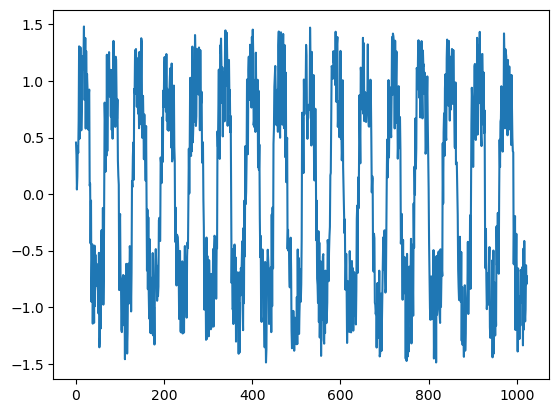

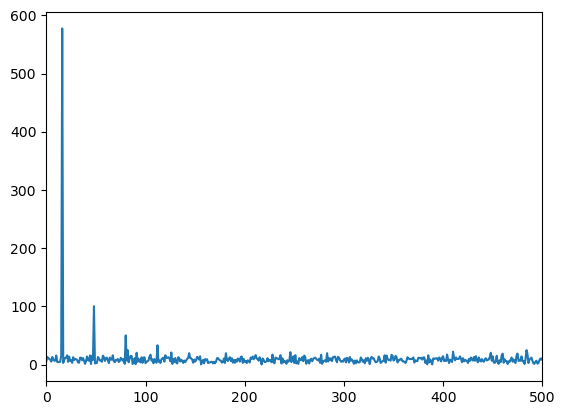

/Users/colinrecker/opt/anaconda3/envs/PHY553/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


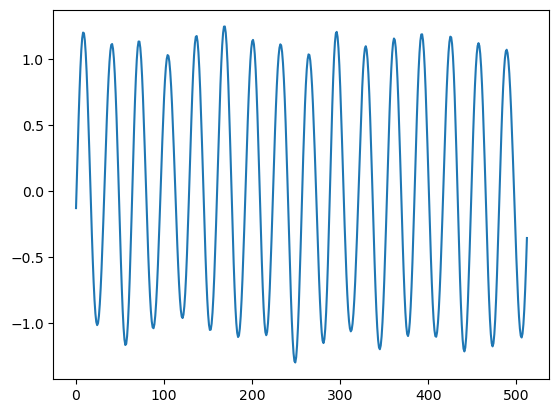

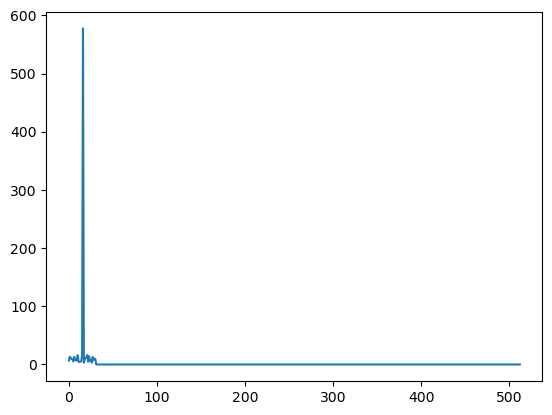

In [4]:
from numpy import loadtxt
import numpy as np
from numpy import fft
from pylab import plot,xlim,show

y = loadtxt("pitch.txt",float)
plot(y[:])
show()

c = dft(y)
plot(abs(c))
xlim(0,500)
show()

#Filtering coefficients >30
filterc = np.zeros(513, dtype='complex_')
for i in range(31):
    filterc[i] += c[i]

yp = fft.ifft(filterc)
plot(yp[:])
show()

plot(abs(filterc))
show()

Here is something to consider. If you were to listen to a sound with these frequencies, you would hear the primary frequency but there would be a hiss due to the white noise.
### Exercise
Imagine if you set all the coefficients smaller than 30 or 40 to zero in the power spectrum? If you did an inverse Fourier transformation what would the graph of the pitch look like then (the first graph)? What would it sound like if you heard this sound after filtering the frequencies? (For reference, Textbook exercise 7.4 explores filtering and smoothing.)
### ANSWER: By only allowing the coefficients smaller tahn 30 or 40 to be non-zero, the inverse Fourier transform would revert the power spectrum back into a signal, which would be a much cleaner signal since the higher harmonics that correspond to coefficients greater than 30 would be eliminated.


As an example of a Fourier analysis let's use Exercise 7.2.

### Exercise 7.2 - Detecting periodicity
In the on-line resources there is a file called sunspots.txt, which contains the observed number
of sunspots on the Sun for each month since January 1749. The file contains two columns of
numbers, the first representing the month and the second being the sunspot number.  

a) Write a program that reads the data in the file and makes a graph of sunspots as a function
of time. You should see that the number of sunspots has fluctuated on a regular cycle for
as long as observations have been recorded. Make an estimate of the length of the cycle
in months.  
b) Modify your program to calculate the Fourier transform of the sunspot data and then
make a graph of the magnitude squared $|c_{k}|^{2}$ of the Fourier coefficients as a function
of k—also called the power spectrum of the sunspot signal. You should see that there
is a noticeable peak in the power spectrum at a nonzero value of k. The appearance
of this peak tells us that there is one frequency in the Fourier series that has a higher
amplitude than the others around it—meaning that there is a large sine-wave term with
this frequency, which corresponds to the periodic wave you can see in the original data.  
c) Find the approximate value of k to which the peak corresponds. What is the period of the
sine wave with this value of k? You should find that the period corresponds roughly to
the length of the cycle that you estimated in part (a).

This kind of Fourier analysis is a sensitive method for detecting periodicity in signals. Even in
cases where it is not clear to the eye that there is a periodic component to a signal, it may still
be possible to find one using a Fourier transform.

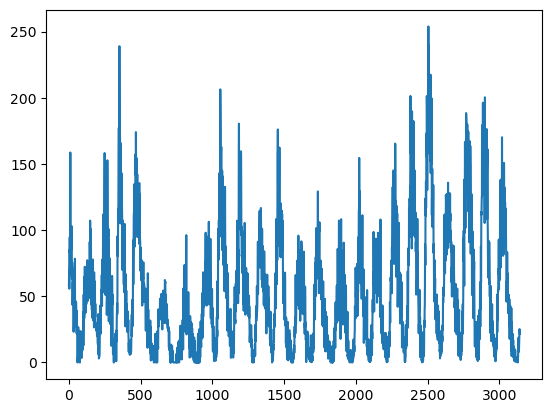

In [5]:
# Part a - Just plot the sunspot data
from numpy import loadtxt
from pylab import plot,xlim,show

y = loadtxt("sunspots.txt",float)
plot(y[:,0], y[:,1])

By eye (I zoomed in a bit) the frequency appears to be around 130 months which is roughly 11 years.

In [6]:
### We will need the total number of months of data. Each data point represents one month
print(len(y))
print("We see there are 3143 months of data. That is the length, L of the interval we are analyzing.")

3143
We see there are 3143 months of data. That is the length, L of the interval we are analyzing.


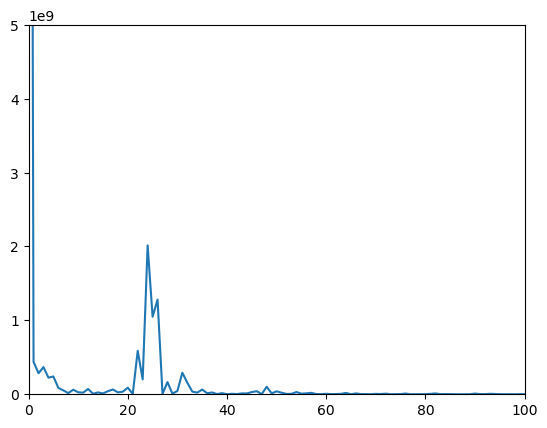

In [7]:
# Part b - Computing the power spectrum
from numpy import loadtxt
from numpy.fft import rfft
from pylab import plot,show,xlim,ylim

c = rfft(y[:,1])    # We can use the fast Fourier transform from numpy.fft
plot(abs(c)**2)     # The power spectrum allows us to see which frequency are most important.
xlim(0,100)         # You can adust the limits to zoom in on values, if needed
ylim(0,5e9)
show()

In [8]:
# Part c - What is the period in months and years corresponding to the primary frequency?
# Each data point is one month. The interval is N=3143 months wide. The peak frequency is k=24.
# The primary frequency is N/k = 3143/24 = 
print(3143/24," months")
print(3143/24/12," years")

130.95833333333334  months
10.913194444444445  years


This corresponds well to what we see in the graph of sunspots versus time.

### Standard Functions for Fast Fourier Transforms
Fourier transforms are so common that it should come as no surprise that there are standard functions available that can perform fast Fourier transforms. These are described in Section 7.4.2. For "real" data points *rfft* is a real, fast Fourier transform and the inverse real, fast Fourier transform is called *irfft*. (If you have complex data points there are similar functions *fft* and *ifft*). If you want 2D Fourier transforms, *rfft2* and *irfft2* are available for real samples and *fft2* and *ifft2* are available for complex samples. These basically do two 1D Fourier transforms.

In the next cell, there is a saw-tooth function coded. We can use these to compute the rfft to get the Fourier coefficients (which are complex) and then compute the inverse transformation with irfft. We see that we recover the original data. Both representations are equivalent.

In [30]:
from numpy import array
import numpy as np
from numpy.fft import rfft,irfft

# Saw-tooth function with ten sample points
y = array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],float)
print(y)

# real, fast Fourier transform (rfft)
c=rfft(y)
print(c)

# Inverse transform (irfft)
y_inverse = irfft(c)
print(y_inverse)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[ 4.5+0.j         -0.5+1.53884177j -0.5+0.68819096j -0.5+0.36327126j
 -0.5+0.16245985j -0.5+0.j        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


There are For some practice, complete exercise 7.1. The example just above may be helpful as an example, especially for part b.

### Exercise 7.1 - Fourier transforms of simple functions
Write Python programs to calculate the coefficients in the discrete Fourier transforms of the
following periodic functions sampled at N = 1000 evenly spaced points, and make plots of
their amplitudes similar to the plot shown in Fig. 7.4:

a) A single cycle of a square-wave with amplitude 1  
b) The sawtooth wave $y_{n} = n$  
c) The modulated sine wave $y_{n} = \sin(πn/N) \sin(20πn/N)$  

If you wish you can use the Fourier transform function from the file dft.py as a starting point
for your program.
### ANSWER (code in the next cells)

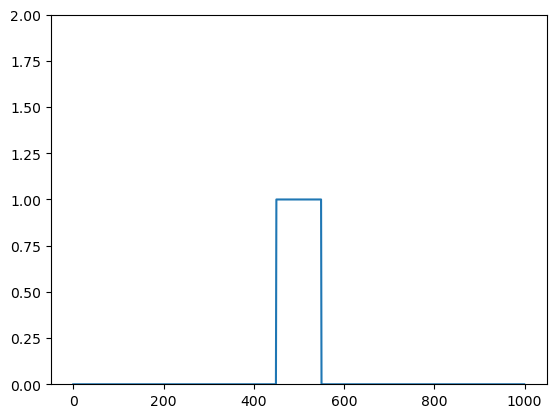

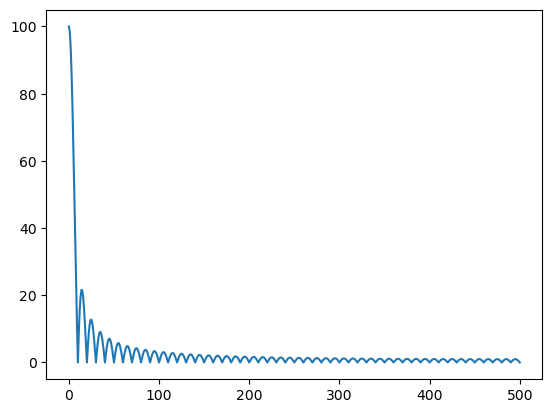

In [39]:
#Part a
y = np.zeros(1000, dtype='complex_')
for i in range(450, 550):
    y[i] += 1
c = rfft(y)

#Square Wave Pulse
plot(y)
ylim(0, 2)
show()

#Power Spectrum
plot(abs(c))
show()

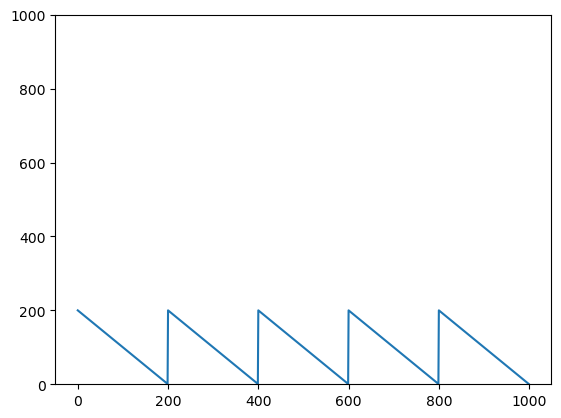

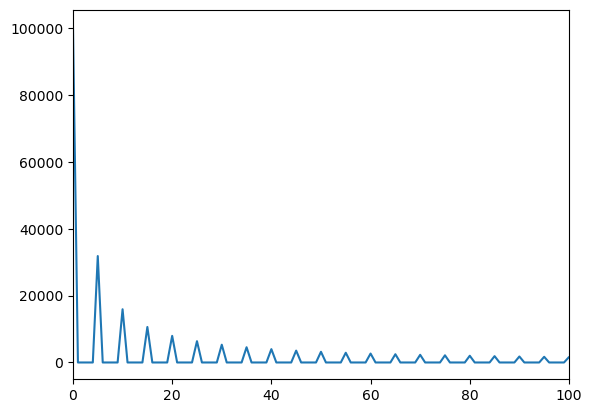

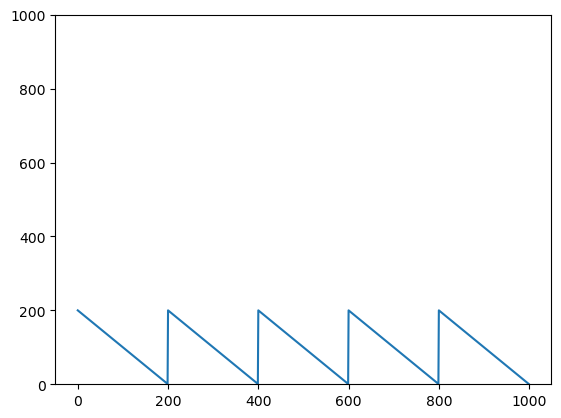

In [141]:
#Part b
y = np.zeros(1000, dtype='complex_')
N = len(y)
div = 5
length = N//div
for i in range(div):
    for j in range(length):
        y[length*i+j] = length-j
        
        
c = rfft(y)

#Sawtooth Wave plot
plot(y)
ylim(0, 1000)
show()

#Power Spectrum plot
plot(abs(c))
xlim(0, 100)
show()

#Inverse Fourier Transform plot
plot(irfft(c))
ylim(0, 1000)
show()

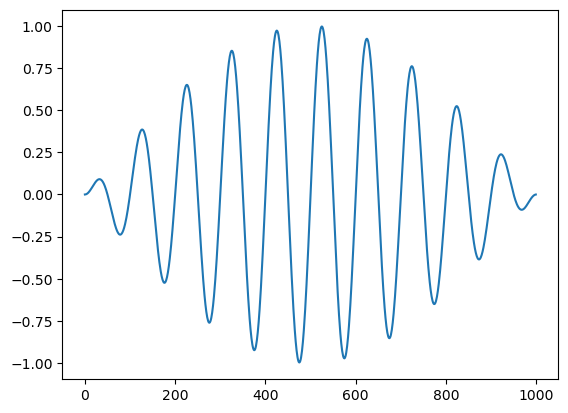

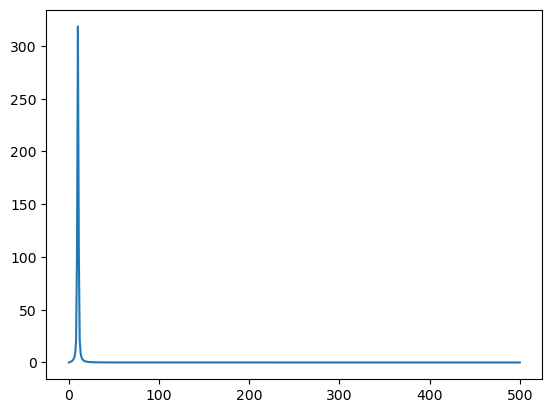

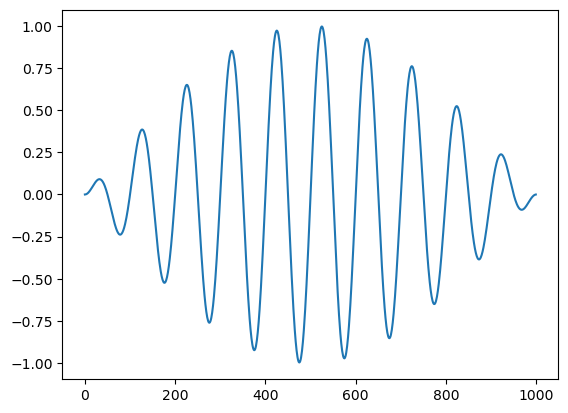

In [147]:
#Part c
y = np.zeros(1000, dtype='complex_')
N = len(y)
div = 5
length = N//div
for n in range(N):
    y[n] = np.sin(np.pi*n/N)*np.sin(20*np.pi*n/N)
c = rfft(y)

#Modulated Sine Wave plot
plot(y)
#ylim(0, 1000)
show()

#Power Spectrum plot
plot(abs(c))
show()

#Inverse Fourier Transform plot
plot(irfft(c))
show()